## Assignment

Import necessary library

In [37]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

import matplotlib as mpl
import matplotlib.pyplot as plt

Read the data

In [38]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

Drop unnecessary columns

In [39]:
# in pandas axis=0 represents rows (default) and axis=1 represents columns.
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


Rename columns title

In [40]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

Add a 'Total' column

In [41]:
df_can['Total'] = df_can.sum(axis=1)

**Question 1:** Let's compare the number of immigrants from India and China from 1980 to 2013.


Step 1: Get the data set for China and India, and display dataframe.

In [42]:
### type your answer here
df_can.set_index('Country', inplace=True)
df_can.loc[['China', 'India']]

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904


Step 2: Plot graph. We will explicitly specify line plot by passing in `kind` parameter to `plot()`.

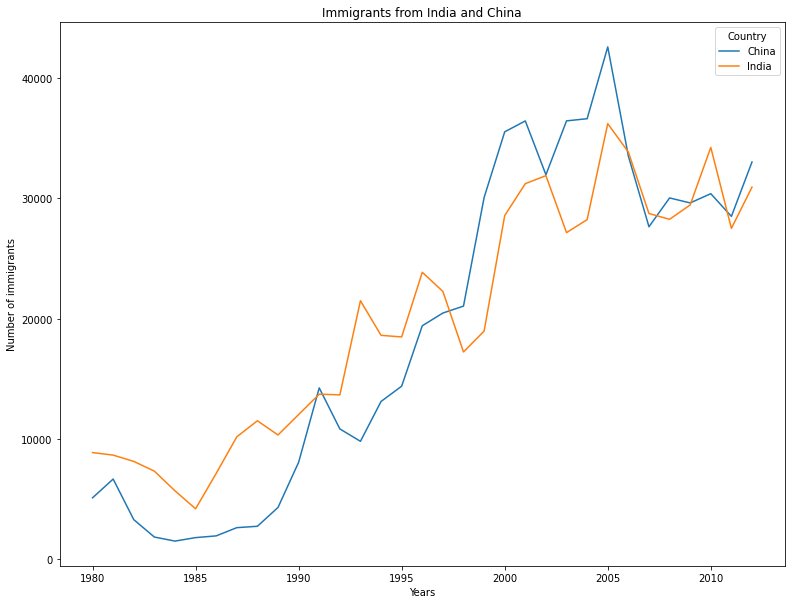

In [43]:
### type your answer here
df_can.columns = list(map(str, df_can.columns))
years = list(map(str, range(1980, 2013)))

ChinIn = df_can.loc[['China', 'India'], years]
ChinIn = ChinIn.transpose()
ChinIn.index = ChinIn.index.map(int)
ChinIn.plot(kind='line', figsize=(13,10))

plt.title('Immigrants from India and China')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')
plt.show()

**Question 2:** Compare the trend of top 5 countries that contributed the most to immigration to Canada.

Step 1: Get the data set for top 5 countries

In [44]:
### type your answer here

df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)

#top 5 entriess
df_top5 = df_can.head()
df_top5 = df_top5[years].transpose()
df_top5.head()



Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


Step 2: Plot graph

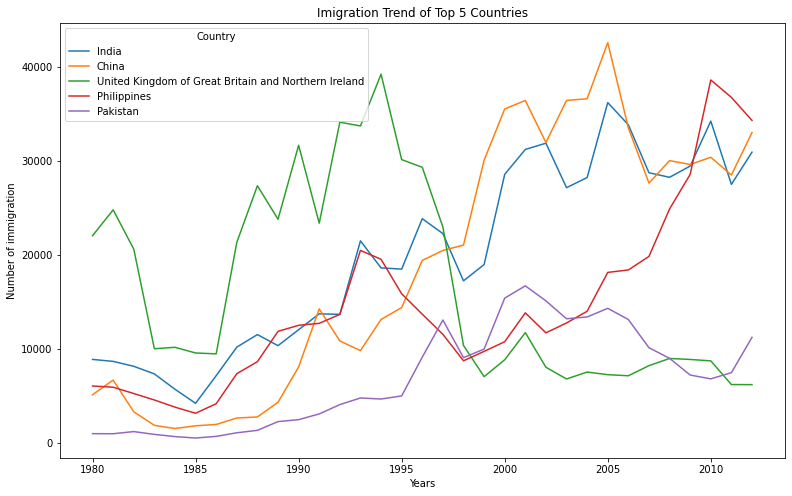

In [45]:
### type your answer here
df_top5.index = df_top5.index.map(int)
df_top5.plot(kind='line', figsize=(13,8))

plt.title('Imigration Trend of Top 5 Countries')
plt.ylabel('Number of immigration')
plt.xlabel('Years')
plt.show()



**Question 3**: Create an unstacked area plot of the 5 countries that contributed the least to immigration to Canada **from** 1980 to 2013. Use a transparency value of 0.55.

Text(0.5, 0, 'Years')

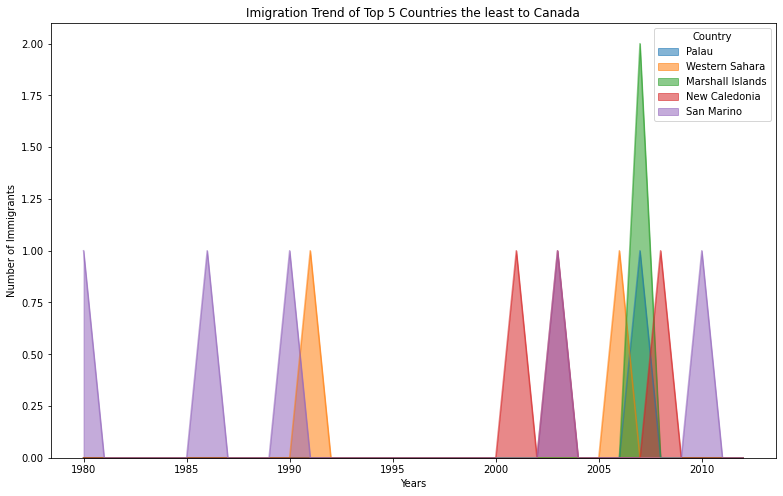

In [46]:
### type your answer here

df_can.sort_values(['Total'], ascending = True, axis = 0, inplace = True)

least = df_can.head()
least = least[years].transpose()
least.index = least.index.map(int)

ax = least.plot(kind='area', stacked=False, alpha=0.55, figsize=(13,8))
ax.set_title('Imigration Trend of Top 5 Countries the least to Canada')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')


**Question 4**: Display the immigration distribution for Greece, Albania, and Bulgaria for years 1980 - 2013? Use an overlapping plot with 15 bins and a transparency value of 0.35.

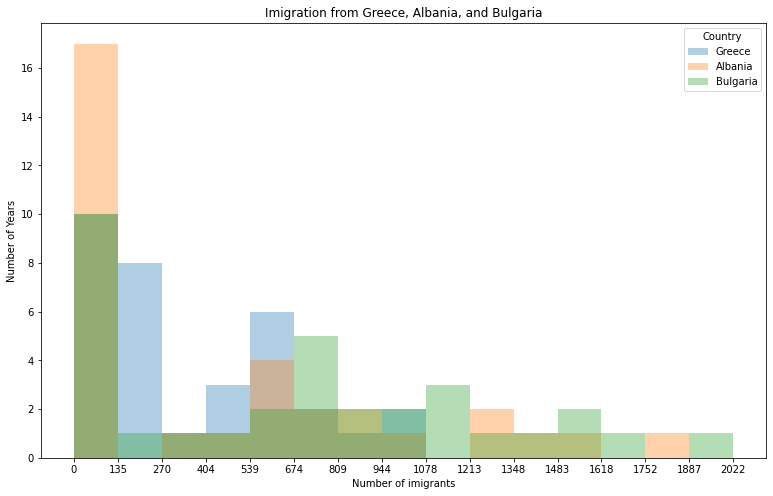

In [47]:
### type your answer here
df = df_can.loc[['Greece', 'Albania', 'Bulgaria'], years].transpose()
count, bin_edges = np.histogram(df, 15)
df.plot(kind = 'hist', bins=15, alpha=0.35, figsize=(13,8), xticks=bin_edges)

plt.title('Imigration from Greece, Albania, and Bulgaria')
plt.ylabel('Number of Years')
plt.xlabel('Number of imigrants')
plt.show()


**Question 5:** Create a *horizontal* bar plot showing the *total* number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013. Label each country with the total immigrant count.

Step 1: Get the data pertaining to the top 15 countries.

In [48]:
### type your answer here

df_can.sort_values(['Total'], ascending=True, inplace=True)
top15 = df_can['Total'].tail(15)
top15



Country
Romania                                                  93585
Viet Nam                                                 97146
Jamaica                                                 106431
France                                                  109091
Lebanon                                                 115359
Poland                                                  139241
Republic of Korea                                       142581
Sri Lanka                                               148358
Iran (Islamic Republic of)                              175923
United States of America                                241122
Pakistan                                                241600
Philippines                                             511391
United Kingdom of Great Britain and Northern Ireland    551500
China                                                   659962
India                                                   691904
Name: Total, dtype: int64

Step 2: Plot data:
   1. Use `kind='barh'` to generate a bar chart with horizontal bars.
   2. Make sure to choose a good size for the plot and to label your axes and to give the plot a title.
<!--    3. Loop through the countries and annotate the immigrant population using the anotate function of the scripting interface. -->

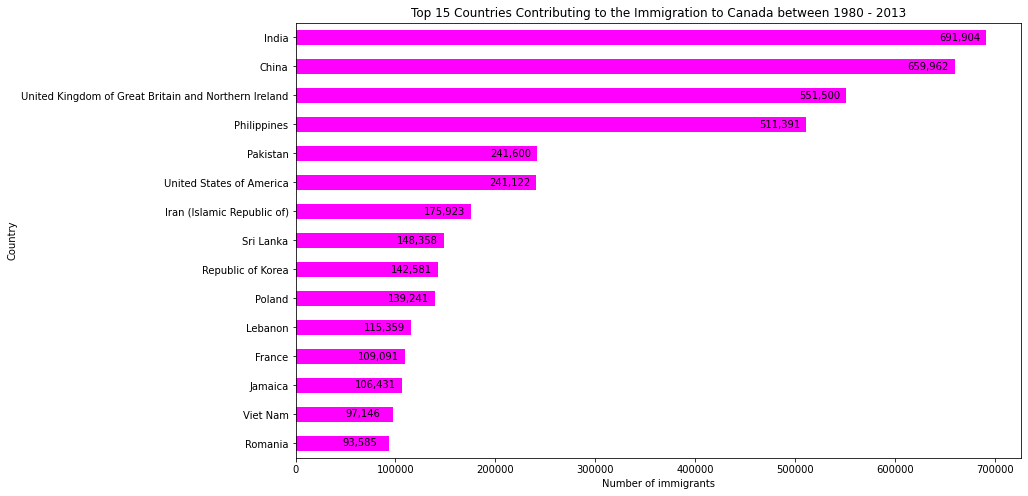

In [52]:
### type your answer here
top15.plot(kind='barh', figsize=(13,8), color='magenta')
plt.xlabel('Number of immigrants')
plt.title('Top 15 Countries Contributing to the Immigration to Canada between 1980 - 2013')

for index, value in enumerate(top15):
    label = format(int(value), ',')
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='black')

plt.show()



# Thank you for completing this lab!

<hr>

Copyright &copy; 2019 [Cognitive Class](https://cognitiveclass.ai/?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).